In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
!pwd


/home/nwoofter/sipm-analysis


## Example waveforms

In [5]:
data_dir = '/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/*/'
glob.glob(data_dir)

['/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_88_light_laser_config_1_cond_ln_intensity_1070/',
 '/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_94_light_laser_config_1_cond_ln_intensity_1070/',
 '/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_90_light_laser_config_1_cond_ln_intensity_1070/',
 '/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_60_light_laser_config_1_cond_ln_long_intensity_1070/',
 '/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_92_light_laser_config_1_cond_ln_intensity_1070/',
 '/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_96_light_laser_config_1_cond_ln_intensity_1070/']

/scratch/gpfs/GALBIATI/data/sipm//hamamatsu_test/2023-07-12/2023-07-12_volt_96_light_laser_config_1_cond_ln_intensity_1070/1/wave0.dat
20812 events


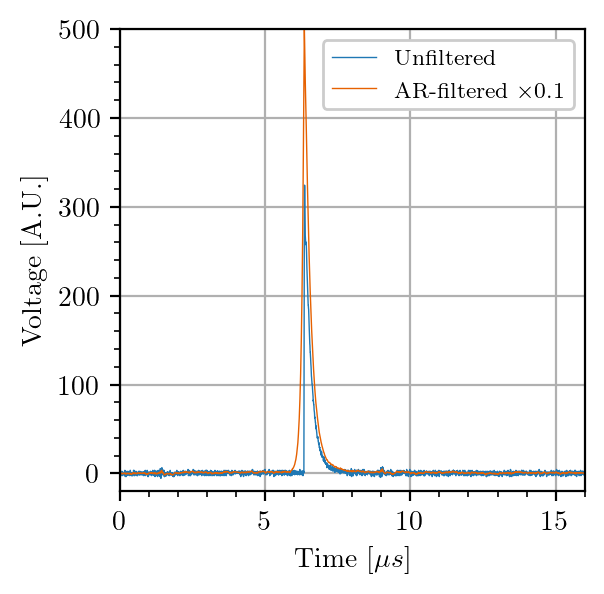

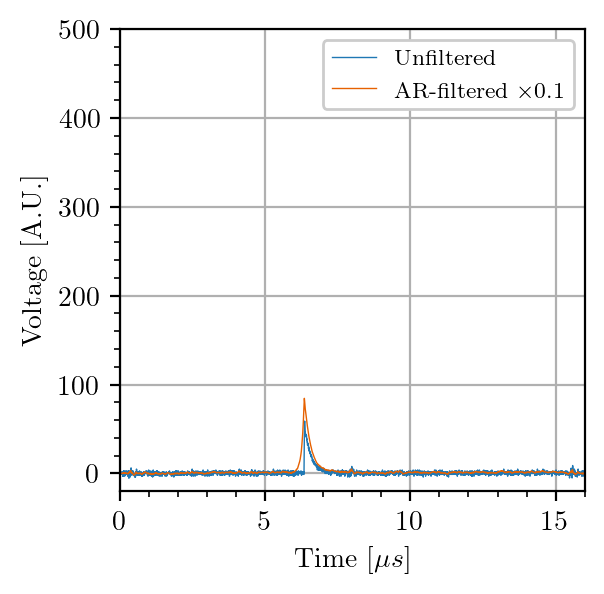

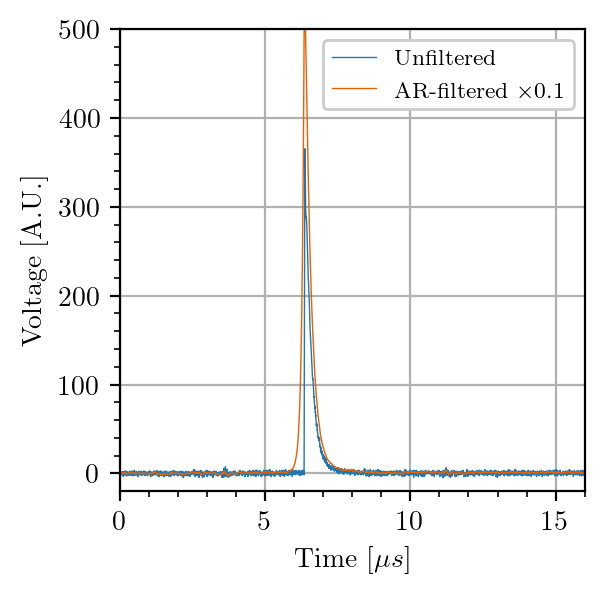

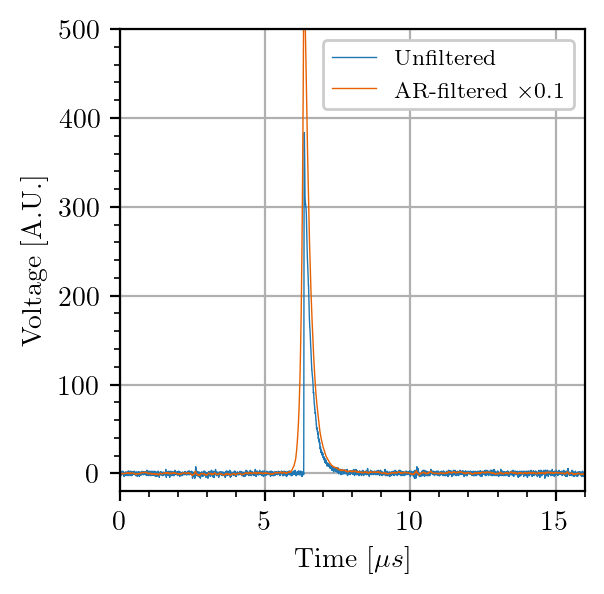

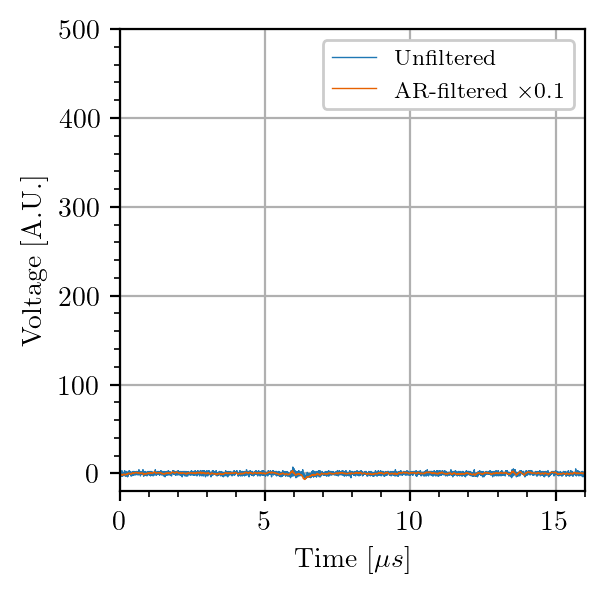

In [7]:
import sipm.recon.WaveformDataset as wfd
ch = 0
evid = np.arange(5, 10)
dset = wfd.WaveformDataset(path='/scratch/gpfs/GALBIATI/data/sipm/hamamatsu_test/2023-07-12/2023-07-12_volt_96_light_laser_config_1_cond_ln_intensity_1070/1/', pol=-1, channels=range(4))
wfs, arwfs = dset.ch[ch].get_waveforms(ev=evid, ar_filter=True)

for i, wf in enumerate(wfs):
    plt.figure(i, figsize=(3, 3))
    plt.plot(dset.ch[ch].time, wf, label='Unfiltered', linewidth=0.5)
    plt.plot(dset.ch[ch].time, arwfs[i]*0.1,
             label=r'AR-filtered $\times0.1$', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.xlabel(r'Time [$\mu s$]')
    plt.ylabel(r'Voltage [A.U.]')
    plt.minorticks_on()
    plt.grid()
    plt.xlim(0, 16)
    plt.ylim(-20, 500)

# Load pre-processed h5 files
These files should be processed by `exe/laser_pulse.py` script.

In [9]:
# data folder
path = "/scratch/gpfs/nwoofter/results/"
data = {}
intensity = [1070]
channels = [0, 1, 2, 3]
voltages = [88]
for intn in intensity:
    data[intn] = {}
    for ch in channels:
        data[intn][ch] = {}
        for volt in voltages:
            data[intn][ch][volt] = []
            files = glob.glob(f"{path}2023-07-12/*volt_{volt}*intensity_{intn}*[!_wf].h5")
            print(files)
            for f in files:
                df = pd.read_hdf(f, key=f'{volt}/{ch}')
                data[intn][ch][volt].append(df)
            data[intn][ch][volt] = pd.concat(
                data[intn][ch][volt], ignore_index=True)
#print('keys: ', list(data[1020][0][88].keys()))

['/scratch/gpfs/nwoofter/results/2023-07-12/2023-07-12_volt_88_light_laser_cond_ln_intensity_1070_config_1_intensity_1070_run0_laser_pulse.h5']
['/scratch/gpfs/nwoofter/results/2023-07-12/2023-07-12_volt_88_light_laser_cond_ln_intensity_1070_config_1_intensity_1070_run0_laser_pulse.h5']
['/scratch/gpfs/nwoofter/results/2023-07-12/2023-07-12_volt_88_light_laser_cond_ln_intensity_1070_config_1_intensity_1070_run0_laser_pulse.h5']
['/scratch/gpfs/nwoofter/results/2023-07-12/2023-07-12_volt_88_light_laser_cond_ln_intensity_1070_config_1_intensity_1070_run0_laser_pulse.h5']


In [10]:
intn = 1070
ch = 0
volt = 88
data[intn][ch][volt]

,baseline_mean,baseline_rms,amplitude_trig,peakpos_trig,integral_0p75us
0,3840.502389,1.460338,676.913906,1587,2530.970648
1,3840.449147,1.419624,143.341090,1587,556.481911
2,3840.801365,1.415949,145.903608,1587,568.868942
3,3840.108532,1.421854,202.153202,1586,741.380887
4,3840.341297,1.454040,842.372262,1587,3162.235495
...,...,...,...,...,...
19995,3840.512628,1.502221,-0.165702,1572,-34.012287
19996,3840.630717,1.307687,1.541342,1570,-64.748805
19997,3841.419795,1.467004,152.280865,1588,600.699659
19998,3841.116724,1.339105,443.150427,1588,1670.994539


(100.0, 300.0)

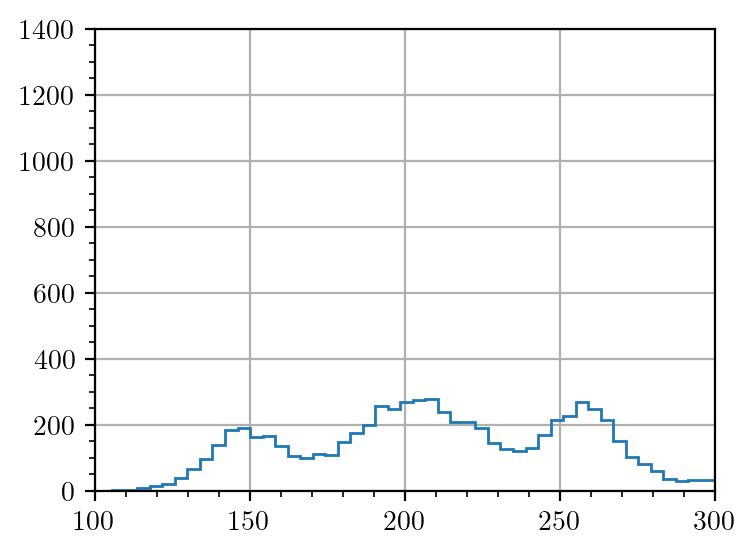

In [21]:
intn = 1070
ch = 0
volt = 88


plt.hist(data[intn][ch][volt]['amplitude_trig'], bins=500, histtype='step')
plt.minorticks_on()
plt.grid()
plt.xlim(100, 300)
#plt.yscale('log')

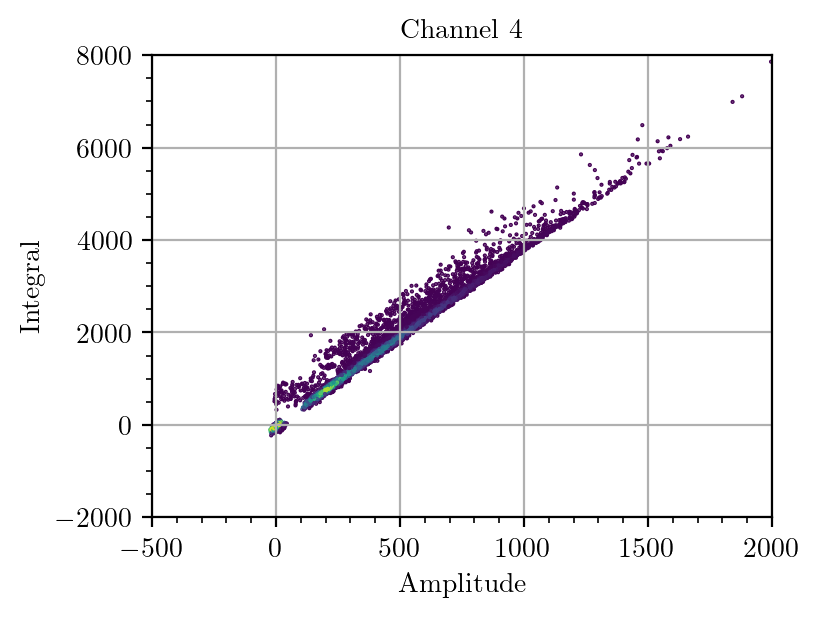

In [15]:
from scipy.stats import gaussian_kde

intn = 1070
ch = 0
volt = 88

amp = data[intn][ch][volt]['amplitude_trig']
integ = data[intn][ch][volt]['integral_0p75us']


xy = np.vstack([amp, integ])
z = gaussian_kde(xy)(xy)

plt.scatter(amp, integ, c=z, s=0.25)
plt.xlabel('Amplitude')
plt.ylabel('Integral')
plt.title('Channel 4')
plt.minorticks_on()
plt.grid()

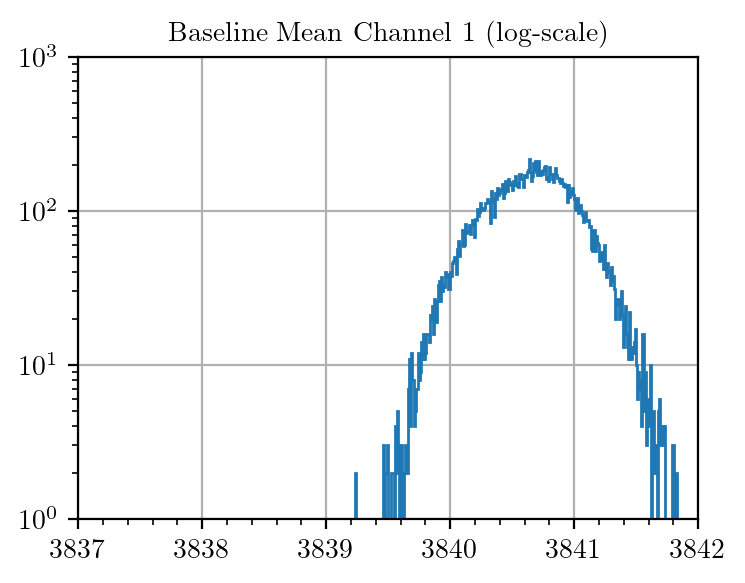

In [16]:
intn = 1070
ch = 0
volt = 88


plt.hist(data[intn][ch][volt]['baseline_mean'], bins=500, histtype='step')
plt.minorticks_on()
plt.title('Baseline Mean Channel 1 (log-scale)')
plt.yscale('log')
plt.grid()

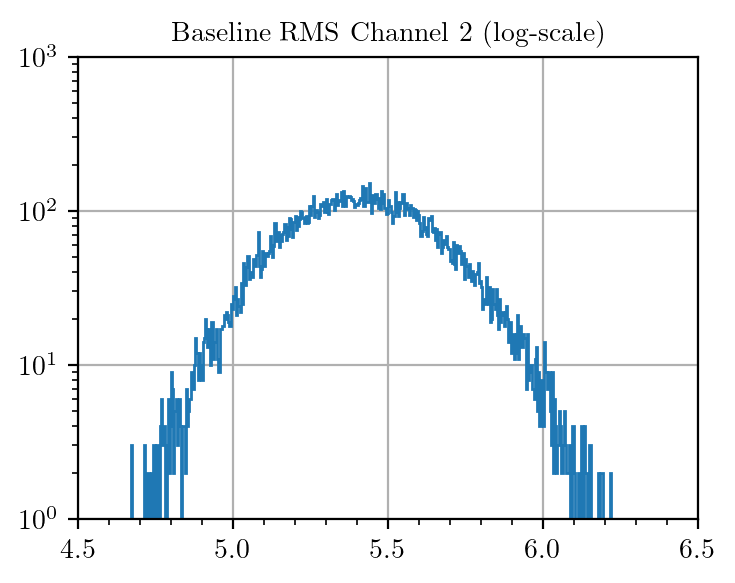

In [17]:
intn = 1070
ch = 1
volt = 88


plt.hist(data[intn][ch][volt]['baseline_rms'], bins=500, histtype='step')
plt.minorticks_on()
plt.title('Baseline RMS Channel 2 (log-scale)')
plt.yscale('log')
#plt.xlim(2, 3)
plt.grid()

<function matplotlib.pyplot.yscale(value, **kwargs)>

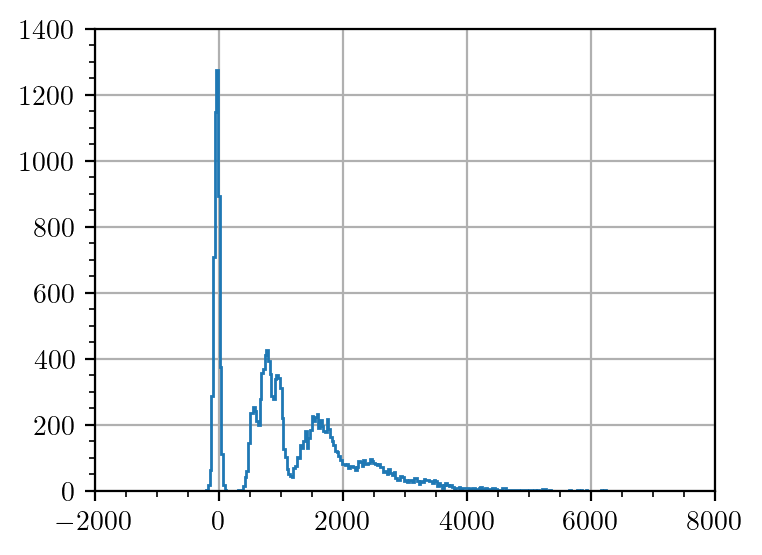

In [19]:
intn = 1070
ch = 0
volt = 88

integral = data[intn][ch][volt]['integral_0p75us']
amp_trig = data[intn][ch][volt]['amplitude_trig']

i = 0
pk2 = []
for x in amp_trig:
    if x > 300 and x < 500:
        pk2.append(integral[i])
    i += 1
    

plt.hist(integral, bins=300, histtype='step')
plt.minorticks_on()
plt.grid()
plt.yscale

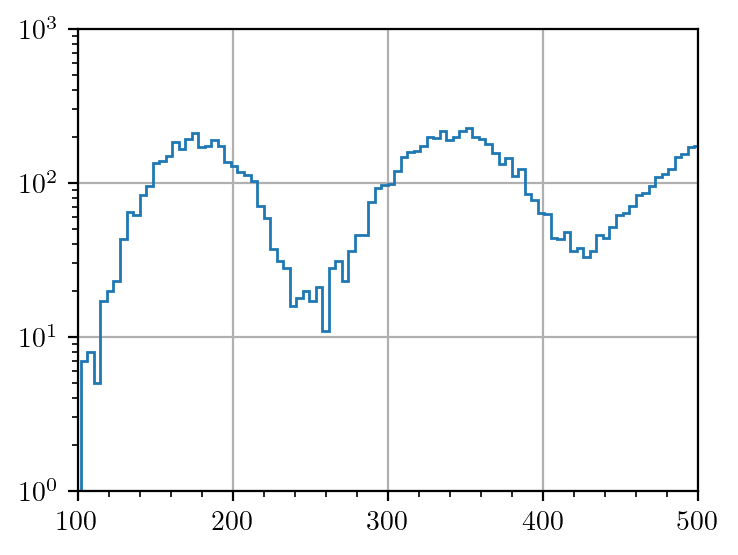

In [20]:
intn = 1070
ch = 1
volt = 88


plt.hist(data[intn][ch][volt]['amplitude_trig'], bins=500, histtype='step')
plt.minorticks_on()
plt.grid()
plt.xlim(100, 500)
plt.yscale('log')

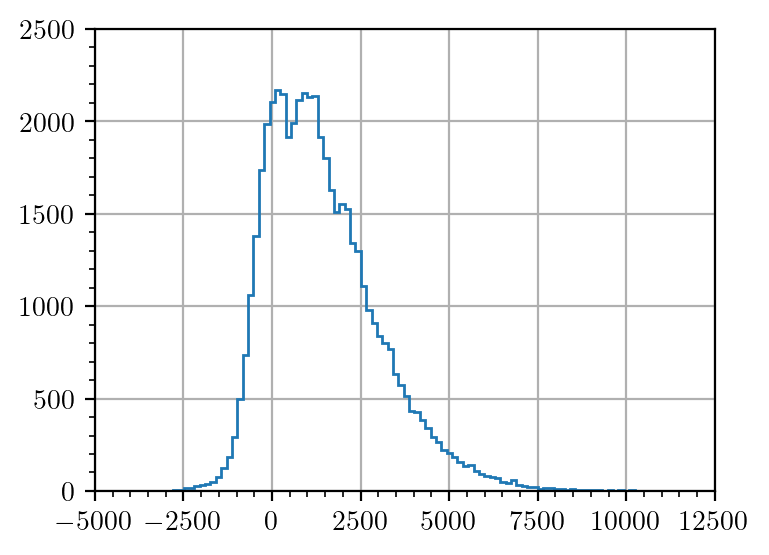

In [15]:
intn = 1020
ch = 1
volt = 90

integral = data[intn][ch][volt]['integral_5p00us']
amp_trig = data[intn][ch][volt]['amplitude_trig']

i = 0
pk2 = []
for x in amp_trig:
    if x > 160 and x < 360:
        pk2.append(integral[i])
    i += 1

plt.hist(integral, bins=100, histtype='step')
plt.minorticks_on()
plt.grid()

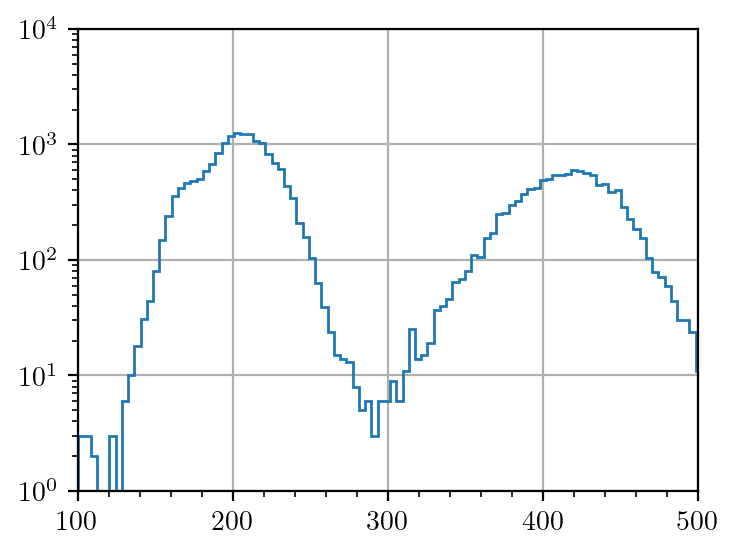

In [16]:
intn = 1020
ch = 2
volt = 90


plt.hist(data[intn][ch][volt]['amplitude_trig'], bins=500, histtype='step')
plt.minorticks_on()
plt.grid()
plt.xlim(100, 500)
plt.yscale('log')

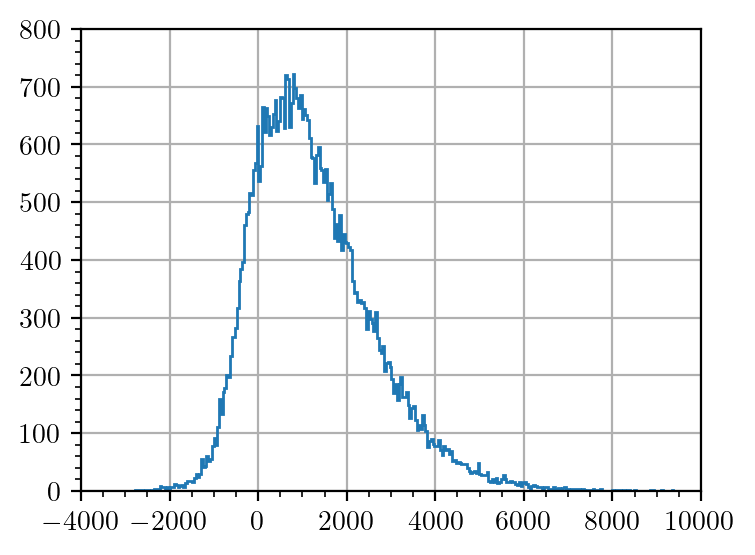

In [17]:
intn = 1020
ch = 2
volt = 90

integral = data[intn][ch][volt]['integral_5p00us']
amp_trig = data[intn][ch][volt]['amplitude_trig']

i = 0
pk2 = []
for x in amp_trig:
    if x > 140 and x < 280:
        pk2.append(integral[i])
    i += 1

plt.hist(integral, bins=300, histtype='step')
plt.minorticks_on()
plt.grid()

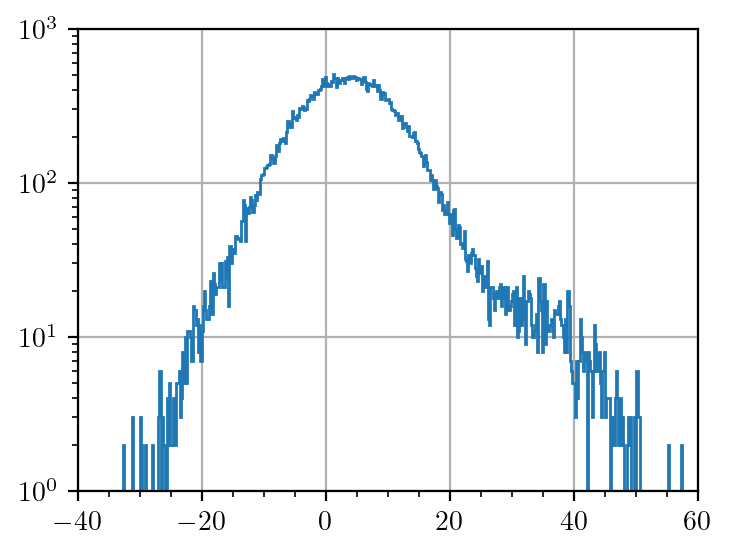

In [18]:
intn = 1020
ch = 3
volt = 90


plt.hist(data[intn][ch][volt]['amplitude_trig'], bins=500, histtype='step')
plt.minorticks_on()
plt.grid()
plt.yscale('log')

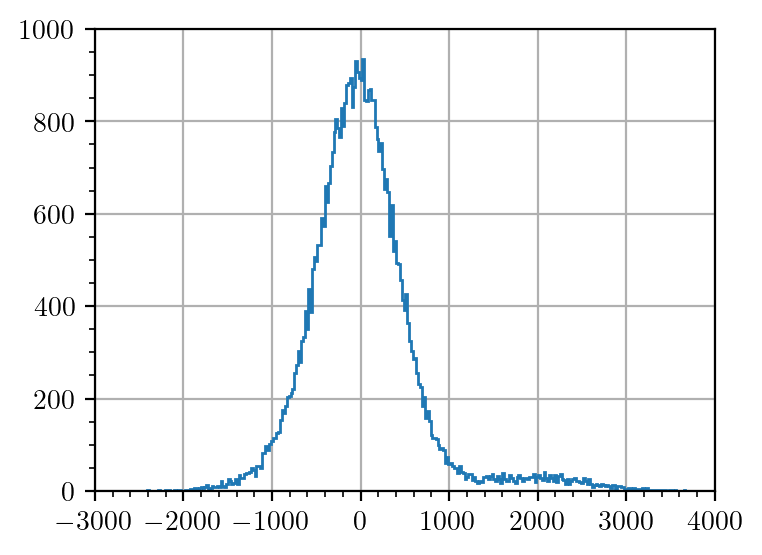

In [19]:
intn = 1020
ch = 3
volt = 90

integral = data[intn][ch][volt]['integral_5p00us']
amp_trig = data[intn][ch][volt]['amplitude_trig']

i = 0
pk2 = []
for x in amp_trig:
    if x > 120 and x < 300:
        pk2.append(integral[i])
    i += 1

plt.hist(data[intn][ch][volt]['integral_5p00us'], bins=300, histtype='step')
plt.minorticks_on()
plt.grid()